In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
import graphviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

ModuleNotFoundError: No module named 'graphviz'

In [2]:
import gdown
url= 'https://drive.google.com/file/d/1FCWnn1mwB-4pFywbJZJyNWqSmSLYXGMx/view?usp=drive_link'
output= 'Linde H25.json'
gdown.download(url, output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1FCWnn1mwB-4pFywbJZJyNWqSmSLYXGMx
To: /content/Linde H25.json
100%|██████████| 20.0M/20.0M [00:00<00:00, 125MB/s] 


'Linde H25.json'

In [8]:
import pandas as pd
import json

# Load the JSON file
with open('Linde H25.json', 'r') as f:
    data = json.load(f)

# Normalize the 'gral' section of the data (adjust 'gral' if it's a different key)
df_gral = pd.json_normalize(data['gral'])

# If there are other sections in your JSON you want as DataFrames, normalize them similarly.
# For example, if you have a section called 'details':
# df_details = pd.json_normalize(data['details'])

# Now you have DataFrames with consistent column lengths
print(df_gral.head())
print(df_gral.info())

FileNotFoundError: [Errno 2] No such file or directory: 'Linde H25.json'

In [4]:
# Normalize the 'trips' section of the data
df_trips = pd.json_normalize(data['trips'])
df_trips.head()
df_trips.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            1528 non-null   object 
 1   start           1528 non-null   int64  
 2   end             1528 non-null   int64  
 3   events          1115 non-null   object 
 4   from.lat        761 non-null    float64
 5   from.lng        761 non-null    float64
 6   to.lat          767 non-null    float64
 7   to.lng          767 non-null    float64
 8   lat             601 non-null    float64
 9   lng             601 non-null    float64
 10  idleTime        601 non-null    float64
 11  fuelEnd         538 non-null    object 
 12  status          601 non-null    object 
 13  dir             601 non-null    object 
 14  kmRec           413 non-null    float64
 15  engOnSec        413 non-null    float64
 16  motionTime      413 non-null    float64
 17  canEngOnSec     413 non-null    f

In [5]:
df_trips.isnull().sum()

,0
type,0
start,0
end,0
events,413
from.lat,767
from.lng,767
to.lat,761
to.lng,761
lat,927
lng,927


In [6]:
import polars as pl
df = pl.read_json('Linde H25.json')
df.head()

gral,trips,details
struct[14],list[struct[19]],list[struct[15]]
"{4087,""2024-06-08T03:00:00.000Z"",""2024-06-16T01:30:52.461Z"",""0"",0,""can"",""BCE"",""next"",""38"",""62007387fb7bc8a33c10ef25274d6b31"",0,311454,57308,403200}","[{""no-gps"",1717815696,1717815818,null,null,null,{null,null},null,{-31.7701,-60.4517},{-31.7701,-60.4517},null,null,null,null,[],null,null,null,null}, {""parked"",1717815818,1717816122,null,null,null,{null,null},null,{null,null},{null,null},null,-31.7701,-60.4517,38,[null],""Detenido 5 minutos"",""Valentin Torra 5001-5400 A 46 Mts, Parana, Entre Rios"",null,""78.0""}, … {""parked"",1718491018,1718501338,null,null,null,{null,null},null,{null,null},{null,null},null,-31.7697,-60.4509,0,[],""Detenido alrededor de 3 horas"",""Valentin Torra 5001-5400 A 98 Mts, Parana, Entre Rios"",null,null}]","[{1717815696,null,null,null,null,12.78,0,false,"""",null,null,null,null,null,""-""}, {1717815818,-31.7701,-60.4517,0,214,12.718,0,false,"""",null,null,null,null,null,""Valentin Torra 5001-5400 A 46 Mts, Parana, Entre Rios""}, … {1718501338,-31.7697,-60.4509,0,284,12.966,0,false,"""",null,null,null,null,null,""Valentin Torra 5001-5400 A 98 Mts, Parana, Entre Rios""}]"


In [7]:
import pandas as pd

# Assuming 'data' is the dictionary you want to convert
# If 'data' is nested, you may need to extract the relevant part for DataFrame creation
relevant_data = data['gral']  # Example: Extract data from the 'gral' key

# Convert the relevant part of the dictionary to a DataFrame
df_pd = pd.DataFrame(relevant_data, index=[0])  # Create a single-row DataFrame

# Convert the DataFrame to a CSV file
df_pd.to_csv('data.csv', index=False)  # Set index=False to exclude index column
df_pd.head()

,object,from,to,mins,velmax,type,dvcType,_v,objType,hash,kmRec,engOnSec,motionTime,canEngOnSec
0,4087,2024-06-08T03:00:00.000Z,2024-06-16T01:30:52.461Z,0,0,can,BCE,next,38,62007387fb7bc8a33c10ef25274d6b31,0,311454,57308,403200


In [8]:
import pandas as pd

# Assuming 'data' is the dictionary you want to convert
# If 'data' is nested, you may need to extract the relevant part for DataFrame creation
relevant_datad = data['details']  # Example: Extract data from the 'gral' key

# Convert the relevant part of the dictionary to a DataFrame
df_pd = pd.DataFrame(relevant_datad)  # Create a single-row DataFrame

# Convert the DataFrame to a CSV file
df_pd.to_csv('data.csv', index=False)  # Set index=False to exclude index column
df_pd.head()

,date,bat,km,engOn,evDesc,dir,lat,lng,speed,heading,wheel_speed,can_fls,can_taho,can_engine_hrs,eng_temp
0,1717815696,12.780,0,False,,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717815818,12.718,0,False,,"Valentin Torra 5001-5400 A 46 Mts, Parana, Ent...",-31.7701,-60.4517,0.0,214.0,NaN,NaN,NaN,NaN,NaN
2,1717815938,12.718,0,False,,"Valentin Torra 5001-5400 A 46 Mts, Parana, Ent...",-31.7701,-60.4517,0.0,214.0,NaN,NaN,NaN,NaN,NaN
3,1717816056,12.709,0,False,,"Valentin Torra 5001-5400 A 46 Mts, Parana, Ent...",-31.7701,-60.4517,0.0,214.0,NaN,NaN,NaN,NaN,NaN
4,1717816072,12.514,0,False,Contacto,"Valentin Torra 5001-5400 A 46 Mts, Parana, Ent...",-31.7701,-60.4517,0.0,214.0,NaN,NaN,NaN,NaN,NaN


In [9]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25244 entries, 0 to 25243
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            25244 non-null  int64  
 1   bat             25244 non-null  float64
 2   km              25244 non-null  int64  
 3   engOn           25244 non-null  bool   
 4   evDesc          25244 non-null  object 
 5   dir             25244 non-null  object 
 6   lat             22890 non-null  float64
 7   lng             22890 non-null  float64
 8   speed           22890 non-null  float64
 9   heading         22890 non-null  float64
 10  wheel_speed     22396 non-null  float64
 11  can_fls         22396 non-null  float64
 12  can_taho        22396 non-null  float64
 13  can_engine_hrs  22396 non-null  float64
 14  eng_temp        22396 non-null  float64
dtypes: bool(1), float64(10), int64(2), object(2)
memory usage: 2.7+ MB


In [10]:
df_pd.describe()

,date,bat,km,lat,lng,speed,heading,wheel_speed,can_fls,can_taho,can_engine_hrs,eng_temp
count,2.524400e+04,25244.000000,25244.0,22890.000000,22890.000000,22890.000000,22890.000000,22396.000000,22396.000000,22396.000000,22396.000000,22396.0
mean,1.718181e+09,13.292831,0.0,-31.769626,-60.450972,2.077195,149.933071,3.569566,76.123683,1529.173781,39972.835462,0.0
std,1.717023e+05,0.453605,0.0,0.000296,0.000392,3.165596,112.613464,3.917767,17.768831,291.716335,30.699371,0.0
min,1.717816e+09,8.163000,0.0,-31.771200,-60.452300,0.000000,0.000000,0.000000,0.000000,45.000000,39915.000000,0.0
25%,1.718056e+09,13.073000,0.0,-31.769800,-60.451000,0.000000,38.000000,0.000000,67.000000,1313.750000,39947.000000,0.0
50%,1.718193e+09,13.321000,0.0,-31.769600,-60.451000,0.000000,146.000000,1.000000,78.000000,1597.000000,39974.000000,0.0
75%,1.718302e+09,13.542000,0.0,-31.769400,-60.450800,4.000000,236.000000,8.000000,89.000000,1790.000000,39997.000000,0.0
max,1.718501e+09,14.579000,0.0,-31.768700,-60.448200,50.000000,358.000000,9.000000,100.000000,2523.000000,40027.000000,0.0


In [11]:
df_pd.isnull().sum()
df_pd.isna().sum()

,0
date,0
bat,0
km,0
engOn,0
evDesc,0
dir,0
lat,2354
lng,2354
speed,2354
heading,2354


In [12]:
df_limpio= df_pd.dropna()
df_limpio.describe()
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20606 entries, 5 to 24977
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            20606 non-null  int64  
 1   bat             20606 non-null  float64
 2   km              20606 non-null  int64  
 3   engOn           20606 non-null  bool   
 4   evDesc          20606 non-null  object 
 5   dir             20606 non-null  object 
 6   lat             20606 non-null  float64
 7   lng             20606 non-null  float64
 8   speed           20606 non-null  float64
 9   heading         20606 non-null  float64
 10  wheel_speed     20606 non-null  float64
 11  can_fls         20606 non-null  float64
 12  can_taho        20606 non-null  float64
 13  can_engine_hrs  20606 non-null  float64
 14  eng_temp        20606 non-null  float64
dtypes: bool(1), float64(10), int64(2), object(2)
memory usage: 2.4+ MB


In [13]:
variables_estudio = df_limpio [['speed', 'wheel_speed', 'can_fls', 'can_taho', 'engOn']]
variables_estudio.corr()

,speed,wheel_speed,can_fls,can_taho,engOn
speed,1.000000,0.443817,0.040961,0.378330,0.182932
wheel_speed,0.443817,1.000000,0.031258,0.690242,0.229986
can_fls,0.040961,0.031258,1.000000,0.048471,0.034294
can_taho,0.378330,0.690242,0.048471,1.000000,0.405996
engOn,0.182932,0.229986,0.034294,0.405996,1.000000


In [14]:
df_trips.describe()
estudio=df_trips[['kmRec','motionTime', 'maxSpeed.speed','fuelIni']]
estudio.corr()
#df_trips.corr()

,kmRec,motionTime,maxSpeed.speed,fuelIni
kmRec,NaN,NaN,NaN,NaN
motionTime,NaN,1.000000,0.283932,NaN
maxSpeed.speed,NaN,0.283932,1.000000,NaN
fuelIni,NaN,NaN,NaN,1.0


In [22]:
features = ['can_taho']
target = 'can_fls'

X = variables_estudio[features]
Y = variables_estudio[target]

X_entrenamiento, X_test, y_entrenamiento, y_test=train_test_split(X, Y)
arbol = DecisionTreeRegressor(max_depth=10)
arbol.fit(X_entrenamiento, y_entrenamiento)


arbol.score(X_entrenamiento, y_entrenamiento)
arbol.score(X_test, y_test)
# Evaluar el modelo (por ejemplo, usando el error cuadrático medio)
from sklearn.metrics import mean_squared_error
y_pred = arbol.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


print(f"Puntaje de precisión del modelo: {arbol.score(X_test, y_test)}")
print(f"Puntaje de precisión del modelo(entrenamiento): {arbol.score(X_entrenamiento, y_entrenamiento)}")



Error cuadrático medio: 301.6961323535731
Puntaje de precisión del modelo: 0.026548609093638098
Puntaje de precisión del modelo(entrenamiento): 0.08518346082118422


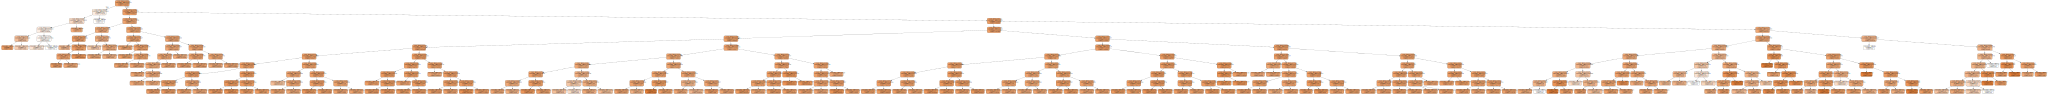

In [23]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=features,
                                class_names=['engOn_False', 'engOn_True'],
                                filled=True, rounded=True,
                                special_characters=True)

# Crear el gráfico
graph = graphviz.Source(dot_data)
graph.render("arbol_decision")  # Guardar el gráfico como un archivo PDF
graph

# Conclusiones generales
Basándonos en estos resultados, podemos inferir lo siguiente:
Este modelo no es el mejor, ya que el Puntaje de precisión del modelo es muy bajo.
Puntaje de precisión del modelo(entrenamiento) muy bajo. con la profundidad (depth=10). El modificarlo solo hace que estos numeros sean aun mas bajos